# Connections between Life Expectancy and GDP for 6 countries

### In this project, connections between GDP and life expectancy will be explored for 6 countries using a data set from the World Health Organization.

#### Project Objectives:

##### * Use seaborn and Matplotlib to create visualizations
##### * Become familiar with presenting and sharing data visualizations
##### * Preprocess, explore, and analyze data

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr

# import data
df = pd.read_csv('all_data.csv')
df.rename(columns={'Life expectancy at birth (years)': 'Expected_Age_yrs'}, inplace=True)
#print(df.head(5))

In [3]:
# determine identity of 6 countries in df
#print(df.Country.unique())
#outout: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

# determine for which years data were collected
#print(df.Year.unique())
#output: [2000 - 2015]

# get familiar with df (missing/nan values?, types of data in each column?, etc.)
#print(df.info()) # no nan/missing values in any row
#print(df.describe()) # why is count value 9.00 for GDP column but 96 for other 2?  It is in sci notation!
#print(df.dtypes) #.info() also tells you this

In [4]:
# subset df based on country
chile = df[df.Country == 'Chile']
#print(chile.head()) # check that subsetting worked for the first country; SUCCESS!
#print(len(chile.Country)) #should be 16 for 2000-2015; SUCCESS!
china = df[df.Country == 'China']
germany = df[df.Country == 'Germany']
mexico = df[df.Country == 'Mexico']
usa = df[df.Country == 'United States of America']
zimbabwe = df[df.Country == 'Zimbabwe']

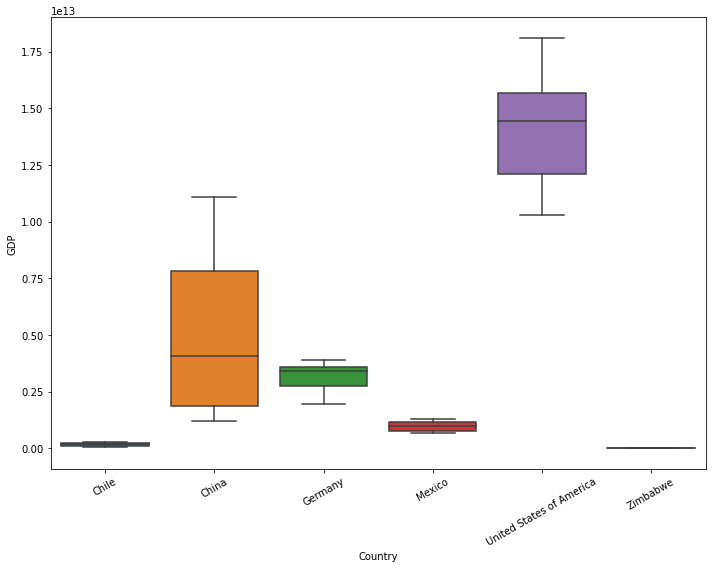

<Figure size 432x288 with 0 Axes>

In [6]:
# plot side-by-side box plots of country GDP data to compare
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Country', y='GDP')

# customize plot
plt.xticks(rotation=30)
plt.tight_layout()

# show and save figure
fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('box_plot_GDPxCountry.png')

#### Clear differences in GDP are observed between the countries, with median GDP in the USA far surpassing that of any other country.  Germany and China appear to be similar; however there is a much greater range observed for China's GDP, suggesting it has changed over time, which Germany's has remained stable.  This narrow range is observed in all other countries except the USA, which shows greater change over time than Germany (and all other countries), but less change than China.

In [7]:
# determine if and where statistically significant differences lie between the countrys' mean GDP between 2000-2015
fstat, pval = f_oneway(chile.GDP, china.GDP, germany.GDP, mexico.GDP, usa.GDP, zimbabwe.GDP)
#print('ANOVA p-value for GDP comparison:', pval)
#output: 1.02e-41; SIGNIFICANT (as expected)

# determine where specific differences lie
tukey_results = pairwise_tukeyhsd(df.GDP, df.Country, 0.05)
#print(tukey_results)

#### Significant differences in GDP for the years sampled (2000-2015) were observed between:
##### * Chile and China (p = 0.001)
##### * Chile and Germany (p = 0.001)
##### * Chile and USA (p = 0.001)
##### * China and Germany (p = 0.041)
##### * China and Mexico (p = 0.001)
##### * China and USA (p = 0.001)
##### * China and Zimbabwe (p = 0.001)
##### * Germany and USA (p = 0.001)
##### * Germany and Zimbabwe (p = 0.001)
##### * Mexico and USA (p = 0.001)
##### * USA and Zimbabwe (p = 0.001)

##### Significance was evaluated using an one-way ANOVA followed by a Tukey's HSD test to compare individual differences with alpha = 0.05.

<Figure size 432x288 with 0 Axes>

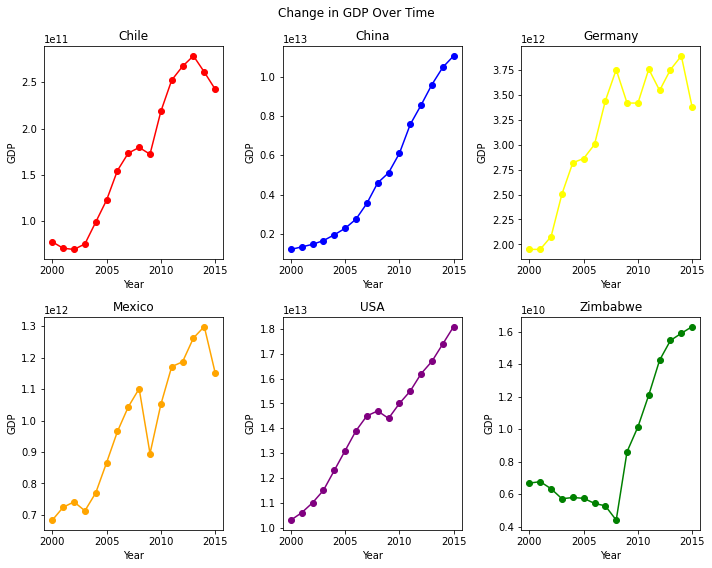

<Figure size 432x288 with 0 Axes>

In [10]:
# clear previous plots
plt.clf()

# plot change in GDP over time to visualize changes between 2000-2015 (y-axes are not scaled equally/standardized here)
plt.figure(figsize=(10,8))

# create Chile graph
plt.subplot(2,3,1)
plt.plot(chile.Year, chile.GDP, color='red', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Chile')

# create China graph
plt.subplot(2,3,2)
plt.plot(china.Year, china.GDP, color='blue', marker='o')
# customize China graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('China')

# create Germany graph
plt.subplot(2,3,3)
plt.plot(germany.Year, germany.GDP, color='yellow', marker='o')
# customize Germany graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Germany')

# create Mexico graph
plt.subplot(2,3,4)
plt.plot(mexico.Year, mexico.GDP, color='orange', marker='o')
# customize Mexico graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Mexico')

# create USA graph
plt.subplot(2,3,5)
plt.plot(usa.Year, usa.GDP, color='purple', marker='o')
# customize USA graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('USA')

# create Zimbabwe graph
plt.subplot(2,3,6)
plt.plot(zimbabwe.Year, zimbabwe.GDP, color='green', marker='o')
# customize Zimbabwe graph
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Zimbabwe')

# plot global figure title
plt.suptitle('Change in GDP Over Time')
plt.tight_layout()

# show and save figure
fig2=plt.gcf()
plt.show()
plt.draw()
fig2.savefig('GDPxyear_for_all_countries.png')

#### This vsiualization allows us to compare the general pattern of change in GDP over time for each country, but makes it difficult to compare one country to the next due to vastly different y-axis scales.  What happens if all y-axes are set to the same scale? See below.

In [11]:
# scale axes to df global GDP max to see how different change over time is at same scale
gdp_max = df.GDP.max()
#print(gdp_max)
#output: 18100000000000.0

In [12]:
# standardize y-axes by setting GDP values to percent of max for each country
#chile['GDP_prop'] = chile.GDP/chile.GDP.max()
#print(chile.head()) #check that it worked; it did!
# china['GDP_prop'] = china.GDP/china.GDP.max()
# germany['GDP_prop'] = germany.GDP/germany.GDP.max()
# mexico['GDP_prop'] = mexico.GDP/mexico.GDP.max()
# usa['GDP_prop'] = usa.GDP/usa.GDP.max()
# zimbabwe['GDP_prop'] = zimbabwe.GDP/zimbabwe.GDP.max()

  Country  Year  Expected_Age_yrs           GDP  GDP_prop
0   Chile  2000              77.3  7.786093e+10  0.279689
1   Chile  2001              77.3  7.097992e+10  0.254971
2   Chile  2002              77.8  6.973681e+10  0.250506
3   Chile  2003              77.9  7.564346e+10  0.271723
4   Chile  2004              78.0  9.921039e+10  0.356380


C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2293294401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile['GDP_prop'] = chile.GDP/chile.GDP.max()
C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2293294401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['GDP_prop'] = china.GDP/china.GDP.max()
C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2293294401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<Figure size 432x288 with 0 Axes>

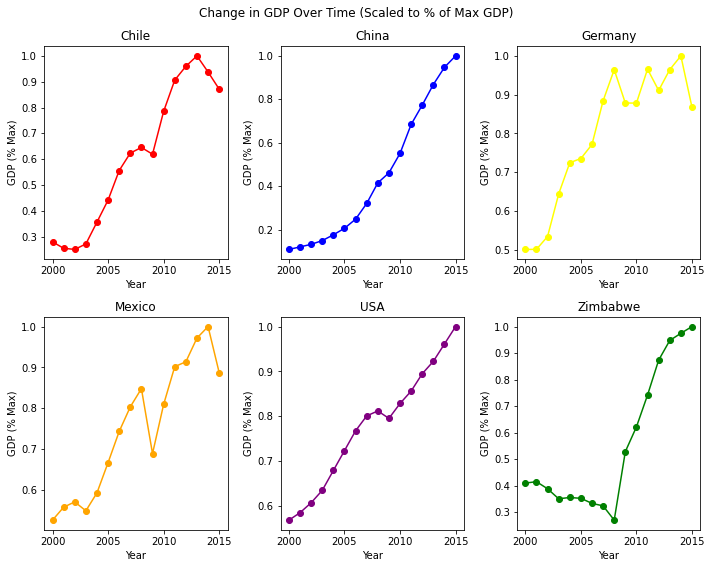

<Figure size 432x288 with 0 Axes>

In [16]:
# clear previous plots
plt.clf()

# plot change in GDP over time to visualize changes between 2000-2015 (with proportional axes - standardized to % of max (0 to 1) for each individaul country) 
plt.figure(figsize=(10,8))

# create Chile graph
plt.subplot(2,3,1)
plt.plot(chile.Year, chile.GDP_prop, color='red', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('Chile')

# create China graph
plt.subplot(2,3,2)
plt.plot(china.Year, china.GDP_prop, color='blue', marker='o')
# customize China graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('China')

# create Germany graph
plt.subplot(2,3,3)
plt.plot(germany.Year, germany.GDP_prop, color='yellow', marker='o')
# customize Germany graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('Germany')

# create Mexico graph
plt.subplot(2,3,4)
plt.plot(mexico.Year, mexico.GDP_prop, color='orange', marker='o')
# customize Mexico graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('Mexico')

# create USA graph
plt.subplot(2,3,5)
plt.plot(usa.Year, usa.GDP_prop, color='purple', marker='o')
# customize USA graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('USA')

# create Zimbabwe graph
plt.subplot(2,3,6)
plt.plot(zimbabwe.Year, zimbabwe.GDP_prop, color='green', marker='o')
# customize Zimbabwe graph
plt.xlabel('Year')
plt.ylabel('GDP (% Max)')
plt.title('Zimbabwe')

# plot global figure title
plt.suptitle('Change in GDP Over Time (Scaled to % of Max GDP)')
plt.tight_layout()

# show and save figure
fig3=plt.gcf()
plt.show()
plt.draw()
fig3.savefig('standardized_GDPxyear_for_all_countries.png')

#### The scaled y-axis shows the same trends as before but in a cleaner more menaingful manner as now countries can be compared to one another, as well as trends in GDP change over time tracked within a given country.  A drawback to this representation is that absolute comparisons of change in GDP from one year to the next cannot be directly quantified.

<Figure size 432x288 with 0 Axes>

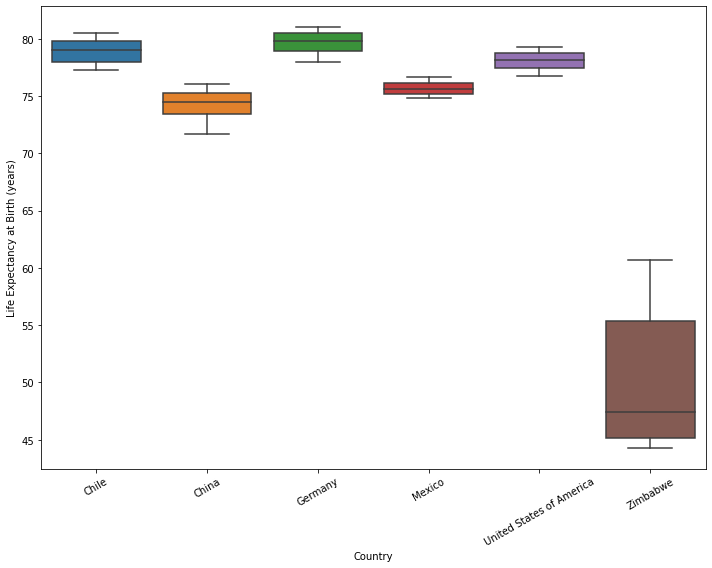

<Figure size 432x288 with 0 Axes>

In [17]:
# how are ages distributed in the various countries?
plt.clf()

# create box plot of life expectancy by country
plt.figure(figsize=(10,8))
sns.boxplot(data =df, x='Country', y='Expected_Age_yrs')

# customize plot
plt.xticks(rotation=30)
plt.ylabel('Life Expectancy at Birth (years)')
plt.tight_layout()

# show and save figure
fig4=plt.gcf()
plt.show()
plt.draw()
fig4.savefig('box_plot_LifeExpectxCountry.png')

#### Clear differences are seen between life expectancy in Zimbabwe compared to other countries; is life expectancy in the remaining countries significantly different from one to the next?

In [99]:
# perform ANOVA to compare average life expectancy at birth from between countries
fstat, pval = f_oneway(chile.Expected_Age_yrs, china.Expected_Age_yrs, mexico.Expected_Age_yrs, germany.Expected_Age_yrs, usa.Expected_Age_yrs, zimbabwe.Expected_Age_yrs)
#print(pval)
#output: 7.885135700050126e-55

# determine where specific differences lie
tukey_results = pairwise_tukeyhsd(df.Expected_Age_yrs, df.Country, 0.05)
print(tukey_results)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                   group2          meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------
                   Chile                    China  -4.6812  0.001  -7.3453  -2.0172   True
                   Chile                  Germany   0.7125    0.9  -1.9516   3.3766  False
                   Chile                   Mexico   -3.225 0.0085  -5.8891  -0.5609   True
                   Chile United States of America  -0.8812    0.9  -3.5453   1.7828  False
                   Chile                 Zimbabwe   -28.85  0.001 -31.5141 -26.1859   True
                   China                  Germany   5.3938  0.001   2.7297   8.0578   True
                   China                   Mexico   1.4563 0.5921  -1.2078   4.1203  False
                   China United States of America      3.8  0.001   1.1359   6.4641   True

#### Life expectancy is the same (no statistically significant difference) between:
#### * Chile & Germany
#### * Chile & USA
#### * China & Mexico
#### * Germany & USA
#### * Mexico & USA

#### Due to large skew in life expectancy for Zimbabwe relative to other countries, modifying the y-axis to show the same scale for all countries squishes most contries. Standardizing y-axis may be better approach.

In [19]:
# standardize y-axes by setting age values to percent of max for each country
chile['age_prop'] = chile.Expected_Age_yrs/chile.Expected_Age_yrs.max()
#print(chile.head()) #check that it worked; it did!
china['age_prop'] = china.Expected_Age_yrs/china.Expected_Age_yrs.max()
germany['age_prop'] = germany.Expected_Age_yrs/germany.Expected_Age_yrs.max()
mexico['age_prop'] = mexico.Expected_Age_yrs/mexico.Expected_Age_yrs.max()
usa['age_prop'] = usa.Expected_Age_yrs/usa.Expected_Age_yrs.max()
zimbabwe['age_prop'] = zimbabwe.Expected_Age_yrs/zimbabwe.Expected_Age_yrs.max()

C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2319878593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile['age_prop'] = chile.Expected_Age_yrs/chile.Expected_Age_yrs.max()
C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2319878593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['age_prop'] = china.Expected_Age_yrs/china.Expected_Age_yrs.max()
C:\Users\keluth\AppData\Local\Temp/ipykernel_24480/2319878593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<Figure size 432x288 with 0 Axes>

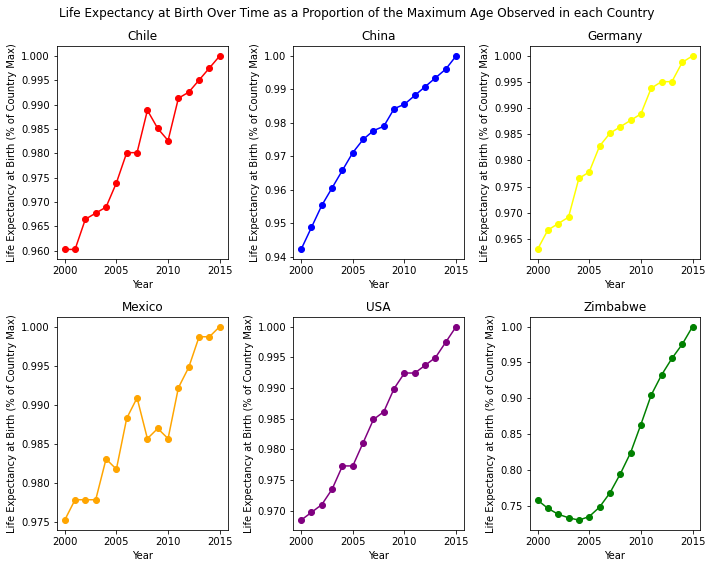

<Figure size 432x288 with 0 Axes>

In [23]:
# plot life expectancy over time to observe traits within and between countries
# clear previous plots
plt.clf()

# plot change in GDP over time as LINE GRAPH to visualize changes between 2000-2015 (y-axes are not set to the same scale here)
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)

# create Chile graph
plt.plot(chile.Year, chile.age_prop, color='red', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('Chile')

# create China graph
plt.subplot(2,3,2)
plt.plot(china.Year, china.age_prop, color='blue', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('China')

# create Germany graph
plt.subplot(2,3,3)
plt.plot(germany.Year, germany.age_prop, color='yellow', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('Germany')

# create Mexico graph
plt.subplot(2,3,4)
plt.plot(mexico.Year, mexico.age_prop, color='orange', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('Mexico')

# create USA graph
plt.subplot(2,3,5)
plt.plot(usa.Year, usa.age_prop, color='purple', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('USA')

# create Zimbabwe graph
plt.subplot(2,3,6)
plt.plot(zimbabwe.Year, zimbabwe.age_prop, color='green', marker='o')
# customize Chile graph
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (% of Country Max)')
plt.title('Zimbabwe')

#plt.supxlabel('Year')
#plt.supylabel('GDP (proportion of max)')
plt.suptitle('Life Expectancy at Birth Over Time as a Proportion of the Maximum Age Observed in each Country')
plt.tight_layout()

# show and save figure
fig5=plt.gcf()
plt.show()
plt.draw()
fig5.savefig('standardized_LifeExpectxyear_for_all_countries.png')